### Day 3 - Time Series Data Visualization with Python

https://machinelearningmastery.com/time-series-data-visualization-with-python/

### 1. Time Series Line Plot

In [2]:
from pandas import read_csv

series = read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
print(series.head())

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64


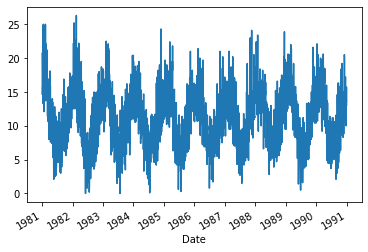

In [3]:
from matplotlib import pyplot

series.plot()
pyplot.show()

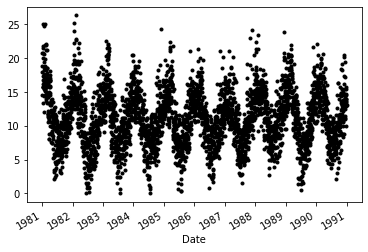

In [4]:
series.plot(style='k.')
pyplot.show()

In [6]:
from pandas import DataFrame

pd = DataFrame(series)
pd

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [10]:
from pandas import Grouper

groups = series.groupby(Grouper(freq='A'))
years = DataFrame()

for name, group in groups:
    years[name.year] = group.values
    
years

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
360,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
361,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
362,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
363,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


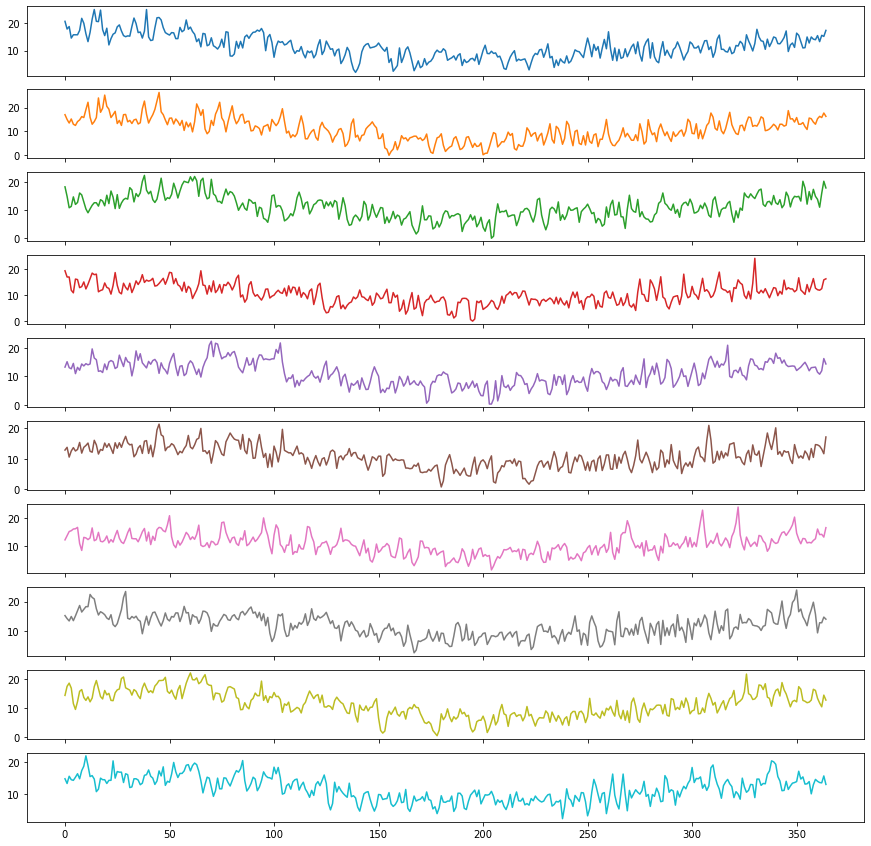

In [16]:
years.plot(subplots=True, legend=False, figsize=(15, 15))
pyplot.show()

### 2. Time Series Histogram and Density Plots

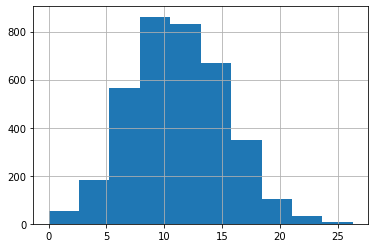

In [17]:
series.hist()
pyplot.show()

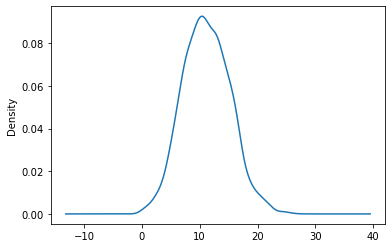

In [18]:
series.plot(kind='kde')
pyplot.show()

### 3. Time Series Box and Whisker Plots by Interval

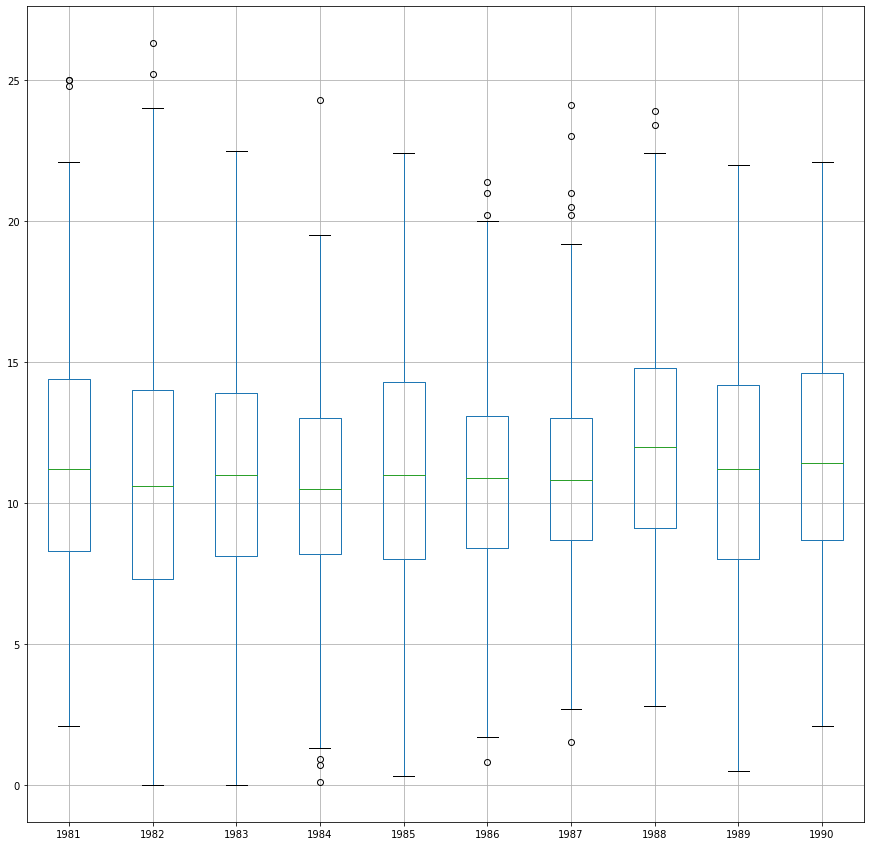

In [21]:
years.boxplot(figsize=(15, 15))
pyplot.show()

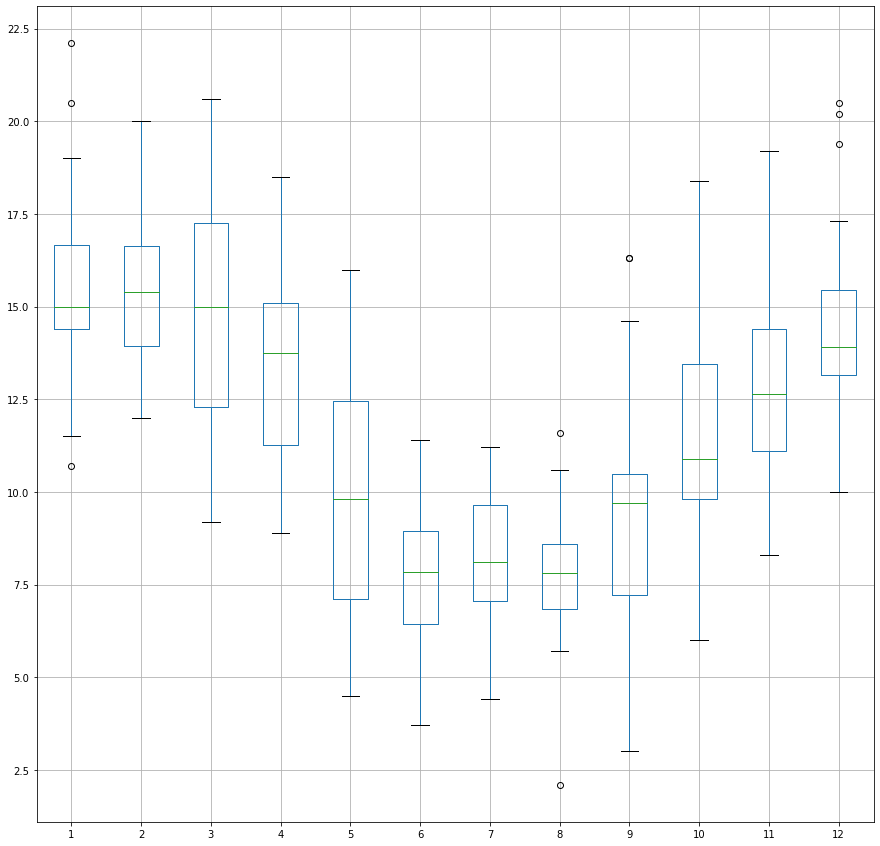

In [24]:
from pandas import concat

one_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))

months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)

months.boxplot(figsize=(15, 15))
pyplot.show()

In [25]:
months

,1,2,3,4,5,6,7,8,9,10,11,12
0,14.8,12.0,19.3,15.3,13.0,9.7,7.4,6.8,6.0,11.3,15.4,13.3
1,13.3,12.2,17.3,14.7,13.9,8.2,7.3,9.8,9.5,10.5,11.8,13.2
2,15.6,14.8,19.0,11.0,12.6,8.4,7.7,5.7,8.6,9.9,13.0,16.2
3,14.5,14.8,19.8,12.2,14.3,8.5,7.7,8.6,7.6,11.0,11.1,17.3
4,14.3,14.4,19.3,14.2,16.0,10.4,9.3,10.6,10.4,14.0,12.5,20.5
5,15.3,12.9,17.2,17.0,13.3,6.8,4.4,7.8,10.3,9.2,18.3,20.2
6,16.4,13.4,14.2,15.8,7.0,6.0,5.7,7.7,7.5,9.8,19.2,19.4
7,14.8,15.9,10.3,15.2,4.9,6.6,10.2,8.6,3.0,6.0,15.4,15.5
8,17.4,16.1,13.0,15.1,6.9,7.8,10.2,6.5,5.3,9.8,13.1,14.1
9,18.8,17.6,15.3,14.7,13.7,10.3,9.3,6.9,10.5,9.2,11.5,11.0


### 4. Time Series Heat Maps

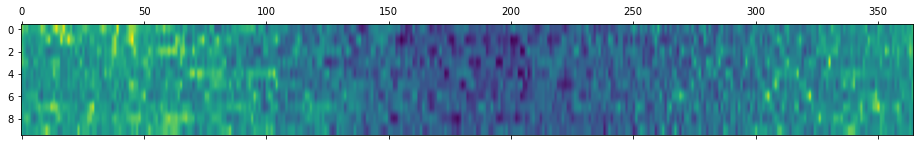

In [31]:
pyplot.matshow(years.T, interpolation=None, aspect='auto')
pyplot.show()

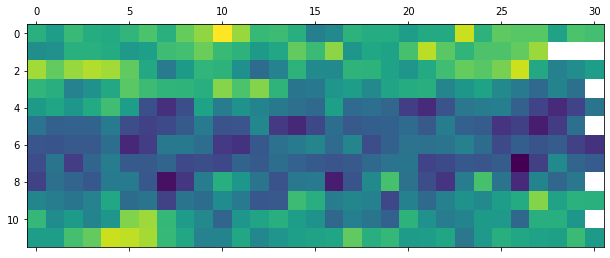

In [32]:
pyplot.matshow(months.T, interpolation=None, aspect='auto')
pyplot.show()

### 5. Time Series Lag Scatter Plots

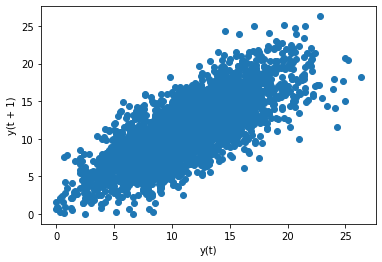

In [33]:
from pandas.plotting import lag_plot

lag_plot(series)
pyplot.show()

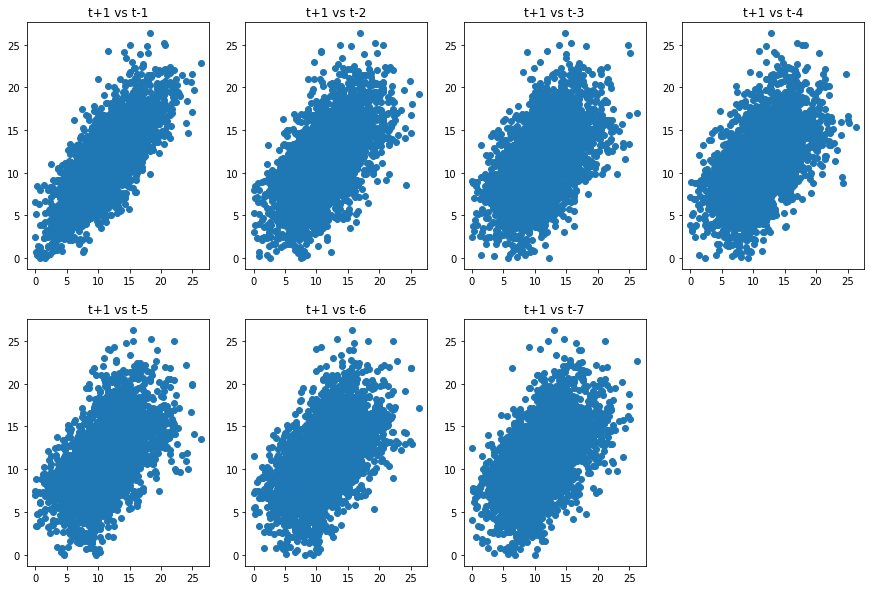

In [42]:
from pandas.plotting import scatter_matrix

values = DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(figsize=(15,10))
pyplot.figure(1)
for i in range(1,(lags + 1)):
    ax = pyplot.subplot(240 + i)
    ax.set_title('t+1 vs t-' + str(i))
    pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()

### 6. Time Series Autocorrelation Plots

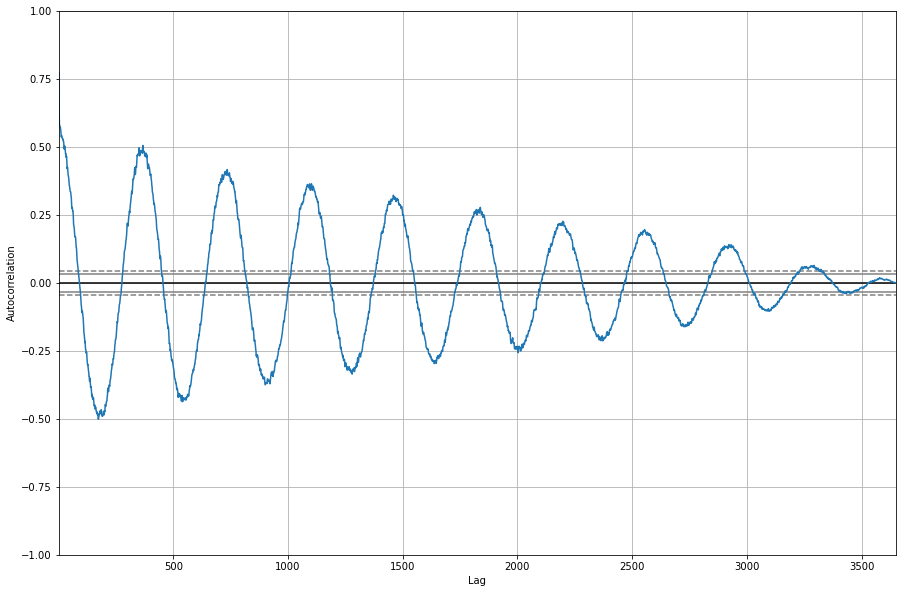

In [45]:
from pandas.plotting import autocorrelation_plot

pyplot.figure(figsize=(15,10))
autocorrelation_plot(series)
pyplot.show()